In [137]:
import pandas as pd
import glob

path = r'D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex'
all_files = glob.glob(path + "/*.csv")

li = []
for filename in all_files:
    print(f'Reading {filename}')
    df = pd.read_csv(filename, index_col=None, header=0, parse_dates=True)
    df['Gmt time'] = pd.to_datetime(df['Gmt time'], format='%d.%m.%Y %H:%M:%S.%f')
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=False)
print(f'Read {frame.size} rows.')

Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2005-31.12.2005.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2006-31.12.2006.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2007-31.12.2007.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2008-31.12.2008.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2009-31.12.2009.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2010-31.12.2010.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2011-31.12.2011.csv
Reading D:\Code\cs-lib-bitcoin-predictions\omittones\datasets\forex\EURUSD_Candlestick_1_m_BID_01.01.2012-31.12.2012.csv
Reading D:\Code\cs-lib-bitcoin-p

In [148]:
prices = frame.set_index('Gmt time')
prices = prices['High'].resample('30min').mean()

In [134]:
from datetime import datetime, timedelta

start = datetime(2016, 1, 1)
weekends = [start + timedelta(days=d) for d in range(0, 365)]
weekends = [w for w in weekends if w.weekday() == 5]

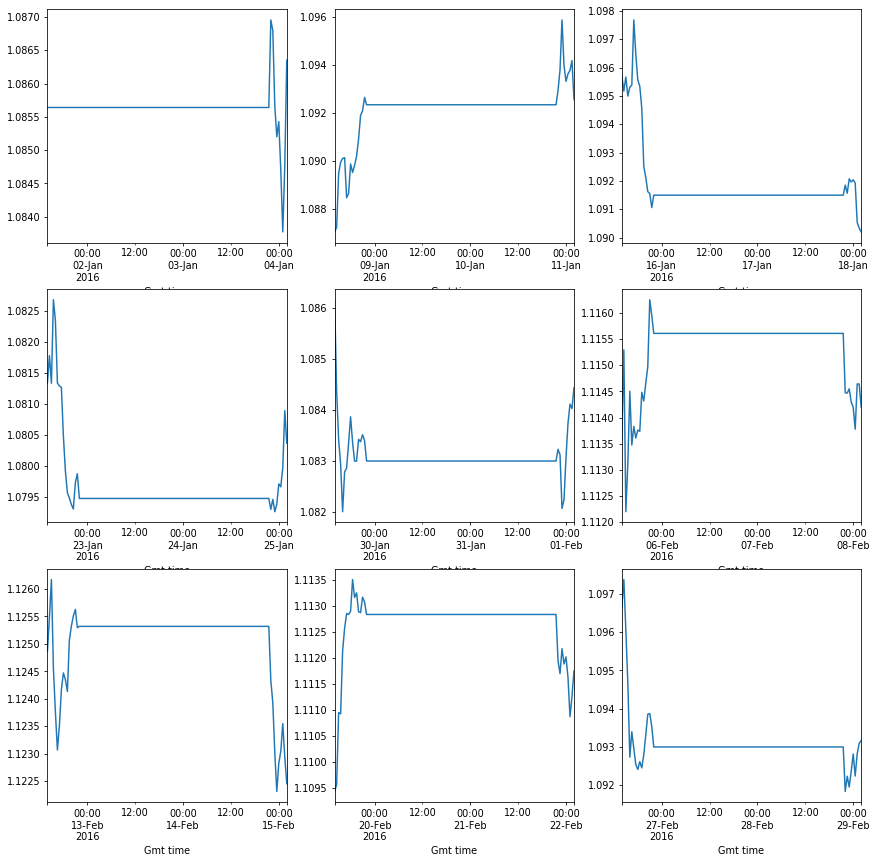

In [155]:
"""Following code shows missing data points during or around weekends.""" 

import matplotlib.pyplot as plt

ROWS = 3
COLS = 3

fig = plt.figure(figsize=(COLS * 5, ROWS * 5), dpi=70)
for i, w in enumerate(weekends):
    if i >= ROWS * COLS:
        break
    f = w - timedelta(hours=10)
    t = w + timedelta(hours=50)     
    axes = fig.add_subplot(ROWS, COLS, i + 1)
    display = prices[f : t]
    display.plot(ax = axes)    

[156]
[5.19990805-1.63753316e-13j]


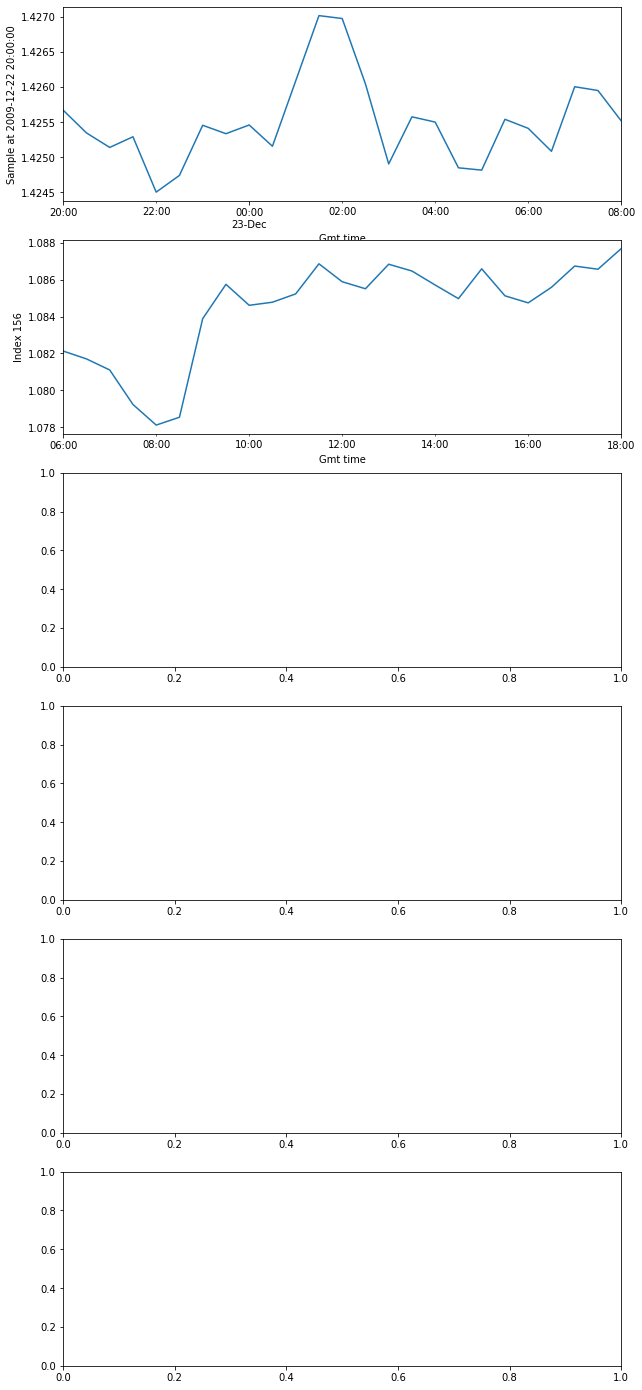

In [243]:
# file:///D:/Dropbox/Books/WORK/DS/100_Time_Series_Data_Mining_Questions__with_Answers.pdf
# https://github.com/matrix-profile-foundation/mass-ts
!pip install mass-ts

import mass_ts as mts
import numpy as np
import random

random_date = None
while random_date is None or random_date.weekday() >= 4:
    hours = random.randrange(0, 8 * 365 * 24)
    random_date = datetime(2007, 1, 1) + timedelta(hours = hours)

# temporary freeze date while debugging
random_date = datetime(2009, 12, 22, 20, 0, 0)
    
query = prices[random_date:random_date + timedelta(hours = 12)]

# Plot the query with top matches
fig, axes = plt.subplots(6, 1, sharex=False, figsize=(10, 25))
query.plot(ax = axes[0])
axes[0].set_ylabel(f'Sample at {random_date}')

subset = prices['2016-01-04':'2016-01-08']
#subset.plot(ax = axes[1])
#distances = mts.mass2(subset.values, query.values)

best_indices, best_dists = mts.mass2_batch(subset.values, query.values, batch_size=100, top_matches=1)
print(best_indices)
print(best_dists)
for ax, idx in zip(axes[1:], best_indices):
    match = subset.iloc[idx : idx + len(query)]
    match.plot(ax = ax)
    ax.set_ylabel(f'Index {idx}')

# # mass2_batch
# # start a multi-threaded batch job with all cpu cores and give me the top 5 matches.
# # note that batch_size partitions your time series into a subsequence similarity search.
# # even for large time series in single threaded mode, this is much more memory efficient than
# # MASS2 on its own.
# batch_size = 10000
# top_matches = 5
# n_jobs = -1
# indices, distances = mts.mass2_batch(ts, query, batch_size, 
#     top_matches=top_matches, n_jobs=n_jobs)

# # find minimum distance
# min_idx = np.argmin(distances)

# # find top 4 motif starting indices
# k = 4
# exclusion_zone = 25
# top_motifs = mts.top_k_motifs(distances, k, exclusion_zone)

# # find top 4 discord starting indices
# k = 4
# exclusion_zone = 25
# top_discords = mts.top_k_discords(distances, k, exclusion_zone)